In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [535]:
def norminten(tbnorm):
    norm = []
    upp = max(tbnorm)
    for entry in tbnorm:
        norm.append(entry/upp)
    return norm

In [204]:
def load_rasc(lst):
    huh = []
    final = pd.DataFrame()
    colnames = ["fgroup", 'mode', 'freq', 'inten', 'source']
    for smile in lst:
        #takes the last filepath as the SMILECODE
        smol = smile.split("/")[-1]
        #replacing the fslash as a /
        if "fslash" in smol:
            smol = ("/".join(smol.split('fslash')))
        try:
            df = pd.read_csv(smile, names=colnames)
            df['fgroup'] = df['fgroup'].str.lstrip("(").str.strip("'")
            df['source'] = df['source'].str.rstrip(")").str.strip("' ")
            df['Rintensity'] = df['Rintensity'].str.strip("' ").astype(float)
            df['mode'] = df['mode'].str.strip(" '")
            df['Rfrequency'] = pd.to_numeric(df['Rfrequency'])
            df.insert(0, "mol", smol)

            final = final.append(df, ignore_index=True)
            #creates list of SMILES that have no rascall data
        except:
            print(smol)
        if df.empty is True:
            huh.append(smol)
    return final, huh

In [228]:
ext = "RASCALL_1.0/RASCALL_1.0_Catalogue/Molecular_Data/"
p_containing = list(set(glob.glob(ext + "*P*/*P*")) - set(glob.glob(ext + "*P*/*P*_RASCALL")))
len(p_containing)

2127

In [747]:
allmol = list(set(glob.glob(ext + "*/*")) - set(glob.glob(ext + "*/*_RASCALL")))
# len(allmol)

In [201]:
jfiles = []
for s in vib.SMILES.unique():
    if "/" in s:
        s = "fslash".join(smol.split('/'))
    jfiles.append(ext+s+"/"+s)

In [209]:
# jfiles

In [748]:
allras, allproblem= load_rasc(allmol)

In [755]:
print(len(allras), len(allproblem))

201985 891


In [318]:
pdf, problem= load_rasc(p_containing)

In [319]:
len(pdf)

25934

In [320]:
len(pdf.fgroup.unique())

44

In [442]:
len(problem)

135

In [303]:
pdf.fgroup.value_counts().nlargest(30)

C[H]                                           44199
[H]C([H])([H])[!#1]                            26092
[H]C([H])([!#1])[!#1]                          19190
[H]N([H])[!#1]                                 11501
CCl                                             9336
[H]C([H])=C([H])[!#1]                           7427
CI                                              7426
[H]OC                                           7168
[H]C([!#1])=C([H])[!#1]                         7164
[H]C([!#1])=C([!#1])[!#1]                       6912
[H]C([!#1])=C([H])[H]                           6366
C=C                                             5065
[H]\\C([!#1])=C(\\[H])[!#1]                     4776
CF                                              4762
CBr                                             4312
[H]C([H])=C([!#1])[!#1]                         4255
[H]\\C([!#1])=C(/[H])[!#1]                      3582
P[H]                                            3050
CN                                            

In [631]:
upp = list(pdf.fgroup.value_counts().nlargest(20).index)

In [306]:
pdf.fgroup.value_counts().nlargest(20).sum()/pdf.fgroup.count()

0.9335247666905958

In [750]:
# pdf.fgroup.count()

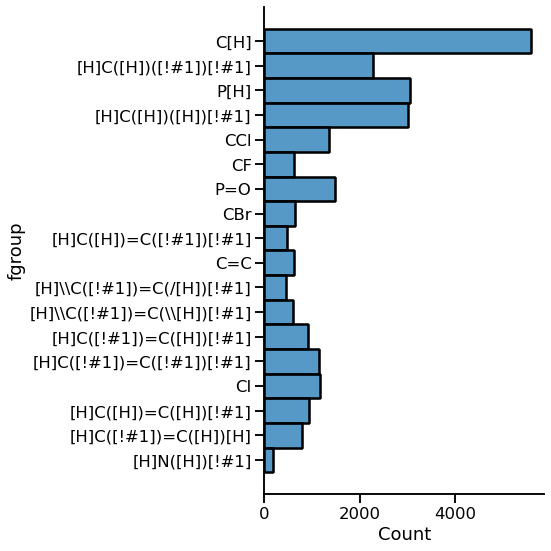

In [21]:
sns.displot(y = 'fgroup', data = pdf.query("fgroup in @upp"),  height = 8)
# plt.vlines(x=multip['freq'], ymin=0, ymax=multip['inten'], color='k', alpha=0.4)
# plt.ylim(0,)


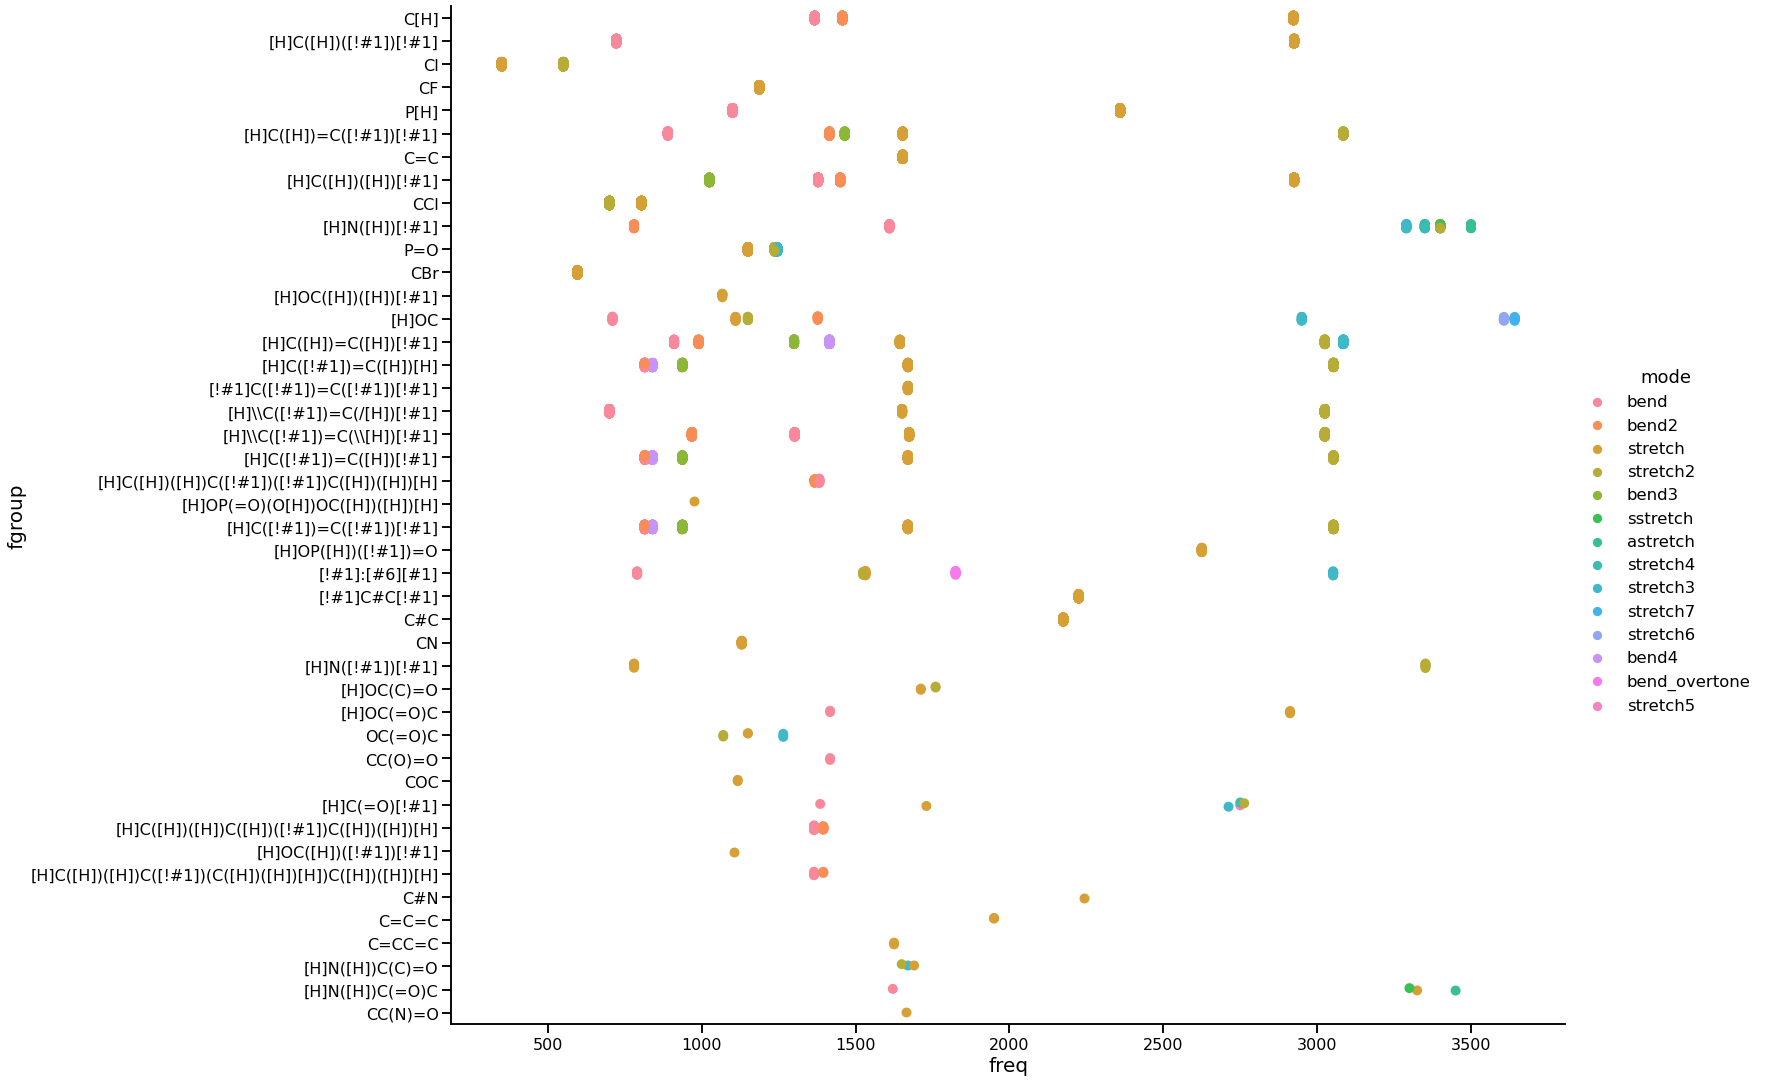

In [709]:
sns.catplot(x = 'freq', y = 'fgroup', hue= 'mode', data=pdf, 
            height = 15,aspect = 1.5, s = 10)

In [293]:
# sns.displot(data=pdf.query("fgroup in @upp"), x="freq", y="fgroup", height = 10)

In [634]:
#COLOUR HIST WITH IF THE FUNCTIONAL GROUP IS P

conditions = [
    (pdf["fgroup"].str.contains("P"))]
choices = ['Yes']
pdf["pgroup"] = np.select(conditions, choices, default='No')



In [638]:
pdf.query("pgroup=='Yes'").fgroup.unique()

array(['P[H]', 'P=O', '[H]OP(=O)(O[H])OC([H])([H])[H]',
       '[H]OP([H])([!#1])=O'], dtype=object)

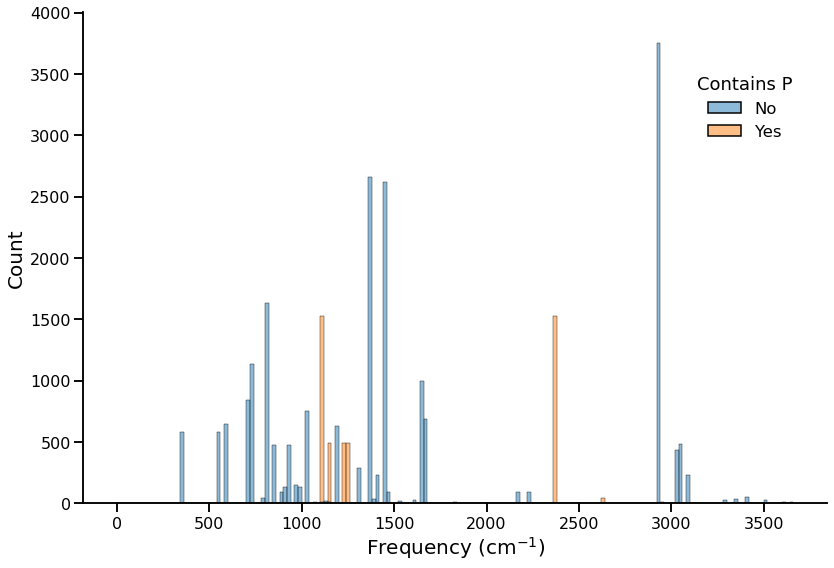

In [724]:
g = sns.displot(data = pdf, x = "freq",  hue='pgroup',kind = 'hist',
                  multiple='layer', height = 8, aspect = 1.5, palette='tab10', binwidth = 20, binrange=(0,pdf.freq.max()))
plt.xlabel("Frequency (cm$^{-1}$)")

# plt.xticks(np.arange(0, 500, step=500));
plt.ylim(0,4001)

new_title = 'Contains P'
g._legend.set_title(new_title)
# plt.setp(ax._legend.get_title(), fontsize=28)
# plt.setp(ax._legend.get_texts(), fontsize=26);
leg = g._legend
leg.set_bbox_to_anchor([0.85, 0.8]) 



Text(0.5, 13.28000000000003, 'Frequency (cm$^{-1}$)')

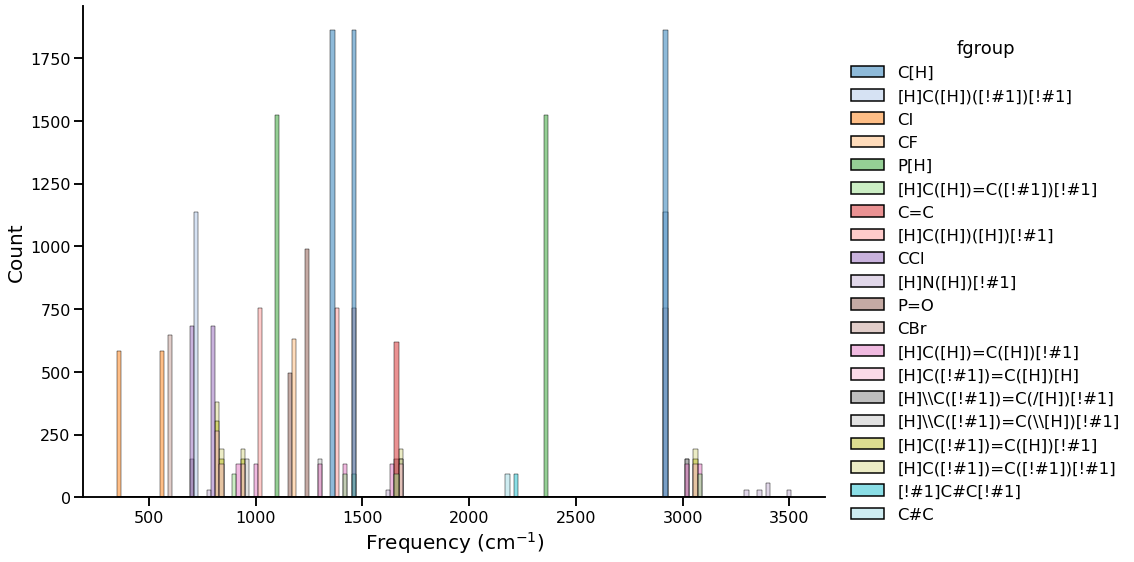

In [729]:
g = sns.displot(data = pdf.query("fgroup in @upp"), x = "freq",  hue='fgroup',kind = 'hist',
                  multiple='layer', height = 8, aspect = 1.5, palette='tab20', binwidth = 20)
plt.xlabel("Frequency (cm$^{-1}$)")

# fig.legend()

In [248]:
pdf[pdf["fgroup"].str.contains("P")].fgroup.unique()

array(['P=O', 'P[H]', '[H]OP([H])([!#1])=O',
       '[H]OP(=O)(O[H])OC([H])([H])[H]'], dtype=object)

In [268]:
# g = sns.displot(data = pdf[pdf["fgroup"].str.contains("P")], x = "freq",  hue='fgroup',kind = 'kde',
#                   multiple='fill', height = 8, aspect = 2, palette='tab20')
# plt.xlabel("Frequency (cm$^{-1}$)")

In [727]:
# # fig = plt.figure(figsize=(10,10))
# g = sns.displot(data = pdf[pdf["fgroup"].str.contains("P")],
#                    x = "freq", binwidth=20, hue='fgroup', multiple='dodge', stat = 'count', 
#                   element = "bars", kind = "hist", height = 8)
# # plt.xticks(rotation = 10);

In [726]:
# sns.catplot(x = 'freq', y = 'fgroup', hue= 'inten', data = pdf[pdf["fgroup"].str.contains("P")], 
#             height = 10,aspect = 2, s = 10)

In [773]:
conditions = [
    (allras["fgroup"].str.contains("P"))]
choices = ['Yes']
allras["pgroup"] = np.select(conditions, choices, default='No')

fg = list(allras.fgroup.value_counts().nlargest(20).index)

In [774]:
allras.query("fgroup in @fg").describe()

,freq,inten
count,188558.000000,188558.000000
mean,1671.027960,2.187480
std,925.960629,0.689032
min,350.000000,1.000000
25%,910.000000,1.500000
50%,1378.000000,2.000000
75%,2923.000000,3.000000
max,3642.000000,3.000000


/Users/mckemmishgroup/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mckemmishgroup/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mckemmishgroup/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mckemmishgroup/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


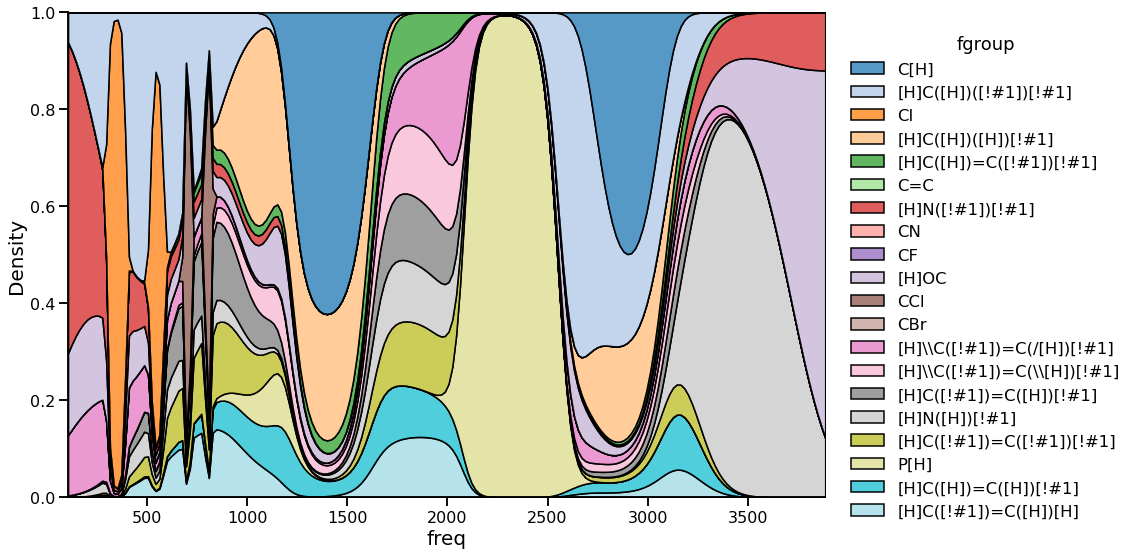

In [775]:
g = sns.displot(data = allras.query("fgroup in @fg"), x = "freq",  hue='fgroup',kind = 'kde',
                  multiple='fill', height = 8, aspect = 1.5, palette='tab20')
# plt.xlabel("Frequency (cm$^{-1}$)")

# plt.xticks(np.arange(0, 500, step=500));
# plt.ylim(0,4001)

In [511]:
vpt2 = pd.read_csv("pmol_vibinfo.csv")
vpt2['Frequency'] = (pd.to_numeric(vpt2['Frequency'], errors='coerce'))
vpt2['Intensity'] = (pd.to_numeric(vpt2['Intensity'], errors='coerce'))


mol2smil = pd.read_csv("molecular_reference_1.txt", names= ['Formula', 'SMILES'])
# mol2smil.head()
vib = vpt2.merge(mol2smil, on="Formula")
vib['BaseForm'] = vib["Formula"].str.split("_", n = 1, expand = True)[0]
vib.head()

,Formula,Kind,Mode,Frequency,Intensity,ModelChem,Group,SMILES,BaseForm
0,C2ClOP,FundHarmonic,1(1),2211.633,446.051916,wB97XD/def2,3_9_atoms,O=PC#CCl,C2ClOP
1,C2ClOP,FundAnharm,1(1),2179.782,415.465070,wB97XD/def2,3_9_atoms,O=PC#CCl,C2ClOP
2,C2ClOP,FundHarmonic,2(1),1253.149,170.302831,wB97XD/def2,3_9_atoms,O=PC#CCl,C2ClOP
3,C2ClOP,FundAnharm,2(1),1202.936,157.419033,wB97XD/def2,3_9_atoms,O=PC#CCl,C2ClOP
4,C2ClOP,FundHarmonic,3(1),910.354,33.251856,wB97XD/def2,3_9_atoms,O=PC#CCl,C2ClOP


In [569]:
vib.query("Intensity < 1000").describe()

,Frequency,Intensity
count,106474.000000,106474.000000
mean,1778.174441,11.050068
std,1294.560709,29.154157
min,-219.429000,0.000000
25%,845.024869,0.065572
50%,1378.215250,1.021700
75%,2787.694000,8.684200
max,7960.173000,932.503701


In [552]:
vib.query("Frequency<0").Formula.unique()

array(['C4H9PS', 'C5H7P_2'], dtype=object)

In [557]:
vib.query("Intensity > 1000").Formula.unique()

array(['C2H3Cl2OP_2', 'C2H3ClFOP_3', 'C2H3F2P_1', 'C2H4FOP_4', 'CH3O4P',
       'CH5O2P', 'H3O2P', 'H3OP', 'H3P', 'C2H5Cl2P_2', 'C2H6ClP_1',
       'H5N2O2P'], dtype=object)

In [470]:
anha = [ 'FundAnharm', 'Overtone', 'CombBand']

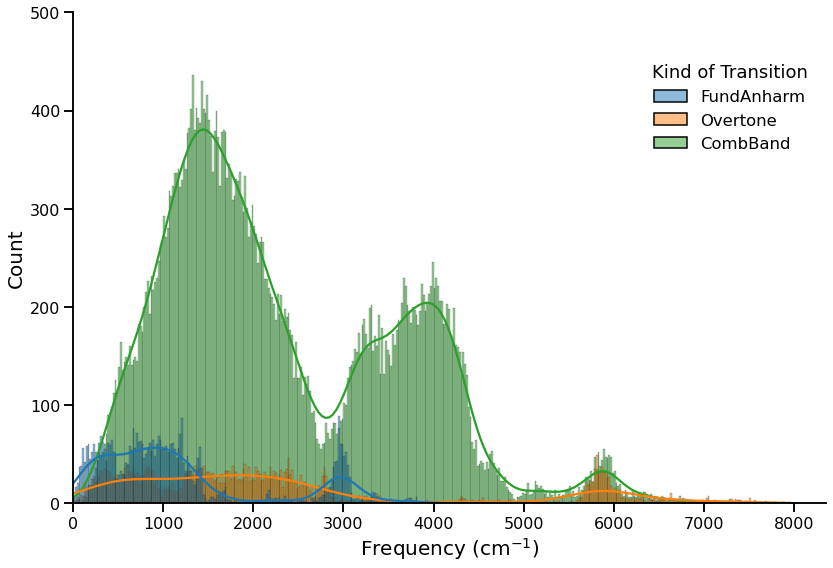

In [733]:
g = sns.displot(data = vib.query("Frequency>0 and Kind in @anha"), x = "Frequency", kind = 'hist',
                binwidth = 20, height = 8, aspect = 1.5, hue = "Kind", kde = True)


plt.xlim(0,)
plt.xlabel("Frequency (cm$^{-1}$)")
plt.ylim(0,500)

new_title = 'Kind of Transition'
g._legend.set_title(new_title)
# new_labels = []
# for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)
# plt.setp(ax._legend.get_title(), fontsize=28)
# plt.setp(ax._legend.get_texts(), fontsize=26);
leg = g._legend
leg.set_bbox_to_anchor([0.8, 0.8]) 


In [530]:
fund = ['FundAnharm', 'FundScaled', 'FundHarmonic']

Text(0.5, 13.28000000000003, 'Frequency (cm$^{-1}$)')

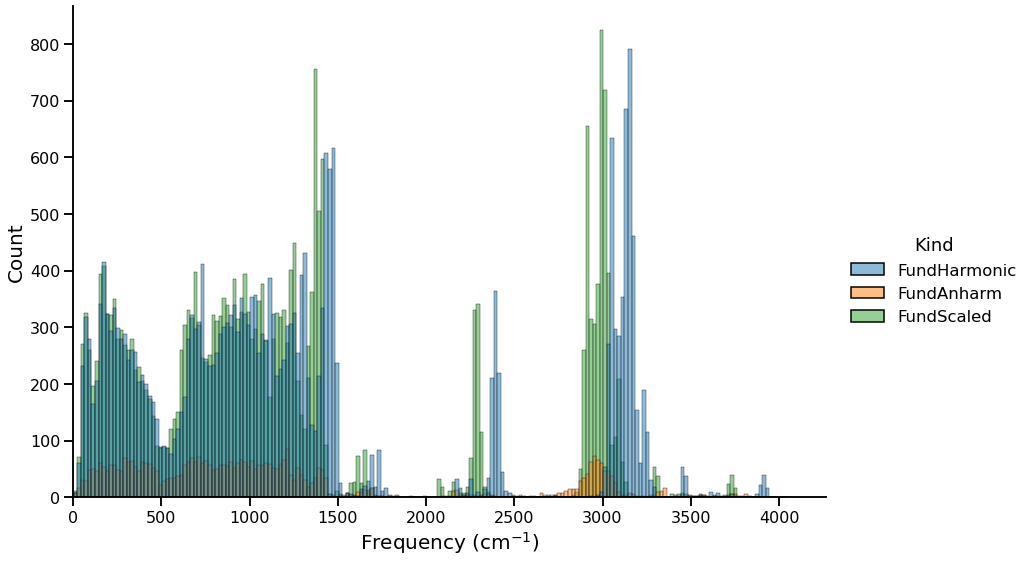

In [734]:
g = sns.displot(data = vib.query("Frequency>0 and Kind in @fund"), x = "Frequency", kind = 'hist',
                binwidth = 20, height = 8, aspect = 1.5, hue = "Kind", multiple = 'layer')
plt.xlim(0,)

plt.xlabel("Frequency (cm$^{-1}$)")


<StemContainer object of 3 artists>

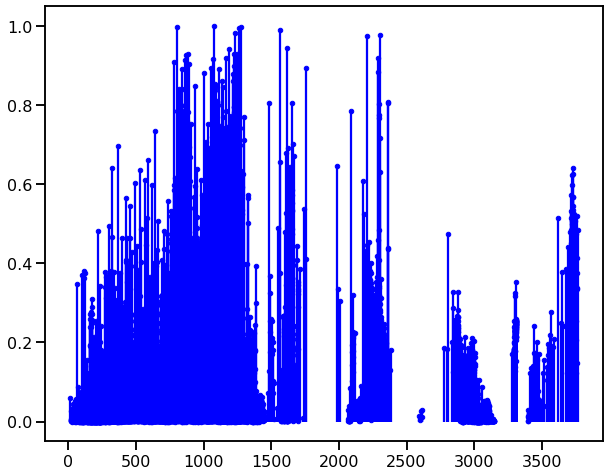

In [753]:
# plt.stem(data = vib.query("Frequency>0 and Intensity < 1000").sort_values("Frequency"), 
#                 x = "Frequency", y = "Intensity",
#                height = 10,  hue = "Kind", kind = "line")

plt.stem(vib.query("Frequency>0 and Intensity < 300 and Kind == 'FundScaled'")['Frequency'],
         norminten(vib.query("Frequency>0 and Intensity < 300 and Kind == 'FundScaled'")['Intensity']), 
         'b', markerfmt='b.', label = "Scaled Harmonic", basefmt=" ")
# plt.xlim(-100,)
# plt.ylim(0.1,10**3)
# plt.yscale('log')


/Users/mckemmishgroup/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'multiple'
  **contour_kws,


(-10.0, 330.05127939862894)

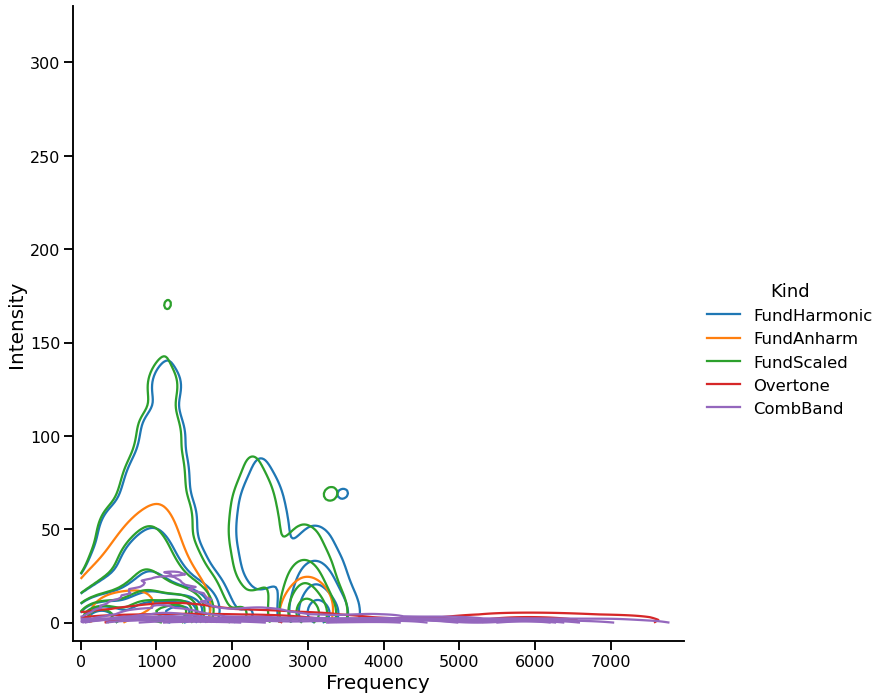

In [751]:
g = sns.displot(data = vib.query("Frequency>0 and Intensity < 300"), x = "Frequency", y = "Intensity",
               height = 10, kind = "kde", hue = "Kind", multiple = "fill", 
                clip=((0,vib.Frequency.max()),(0,vib.Intensity.max())))
plt.xlim(-100,)
plt.ylim(-10,)
# plt.ylim(0.1,10**3)
# plt.yscale('log')


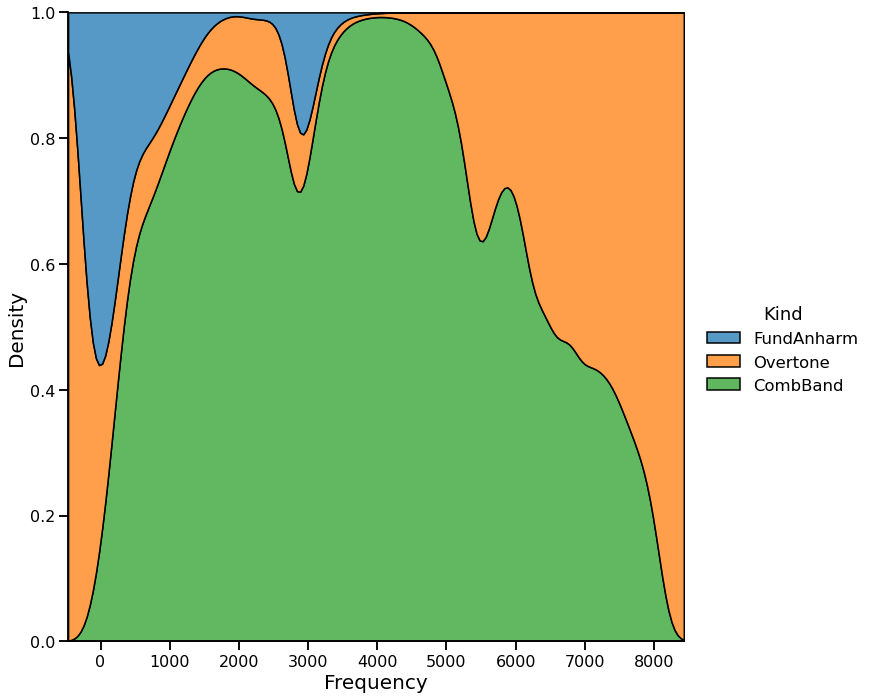

In [478]:
g = sns.displot(data = vib.query("Frequency>0 and Intensity < 120 and Kind in @anha"), x = "Frequency",
               height = 10, kind = "kde", hue = "Kind", multiple = "fill")

In [484]:
vib.Kind.unique()

array(['FundHarmonic', 'FundAnharm', 'FundScaled', 'Overtone', 'CombBand'],
      dtype=object)

Scaled vs Unscaled Fund Harmonics

In [485]:
freq = vib.query("Frequency > 0").pivot_table(values='Frequency', index='Formula', columns='Kind').reset_index()
freq = freq.drop(['CombBand', 'Overtone'], axis= 'columns')

In [497]:
scal = freq[['Formula', 'FundAnharm', 'FundScaled']]
scal["Scaled"] = "Yes"
scal["FundHarmonic"] = scal['FundScaled']

harm = freq[['Formula', 'FundAnharm', 'FundHarmonic']]
harm['Scaled'] = 'No'

scaled = harm.append(scal)

In [498]:
scaled = harm.append(scal)

In [499]:
scaled[scaled["Scaled"]=="Yes"]

,Formula,FundAnharm,FundHarmonic,Scaled,FundScaled
0,C2ClOP,686.961333,661.706105,Yes,661.706105
1,C2FOP,741.365667,729.383058,Yes,729.383058
2,C2H2Cl2FP_2,955.029944,871.260459,Yes,871.260459
3,C2H2Cl2FP_3,908.181333,872.385408,Yes,872.385408
4,C2H2Cl3P_1,875.603556,837.221176,Yes,837.221176
...,...,...,...,...,...
855,H5N2O2P,1275.764375,1293.173626,Yes,1293.173626
856,H6N3OP,NaN,1337.786530,Yes,1337.786530
857,HO2P,1257.837333,1249.946815,Yes,1249.946815
858,HOP,1301.253000,1412.430695,Yes,1412.430695


In [500]:
scaled["An_H"] = scaled["FundAnharm"] - scaled["FundHarmonic"]

(0.0, 2730.827925)

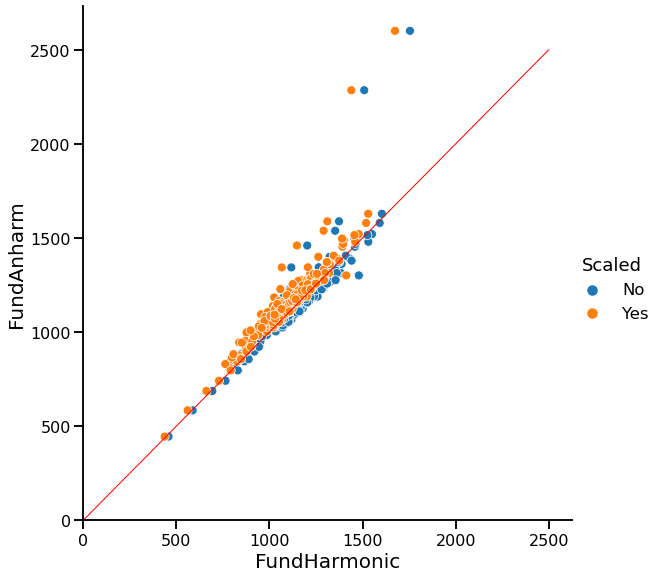

In [503]:
sns.relplot(x = 'FundHarmonic', y = 'FundAnharm', hue = "Scaled", data = scaled, height = 8)


x = list(range(0,2500))
y = list(range(0,2500))
plt.plot(x,y, '-r', linewidth = 1)

plt.xlim(0,)
plt.ylim(0,)

In [504]:
scaled.groupby("Scaled").An_H.describe()

,count,mean,std,min,25%,50%,75%,max
Scaled,,,,,,,,
No,227.0,8.422838,89.629360,-178.972000,-25.960604,-6.178333,22.064771,845.877667
Yes,227.0,61.502564,91.016257,-111.177695,25.349790,47.285631,74.276182,926.252583


In [570]:
# pdf.head()

In [561]:
vibSM = vib.SMILES.unique()
subpdf = pdf.query("mol in @vibSM")

Text(0.5, 13.28000000000003, 'Frequency (cm$^{-1}$)')

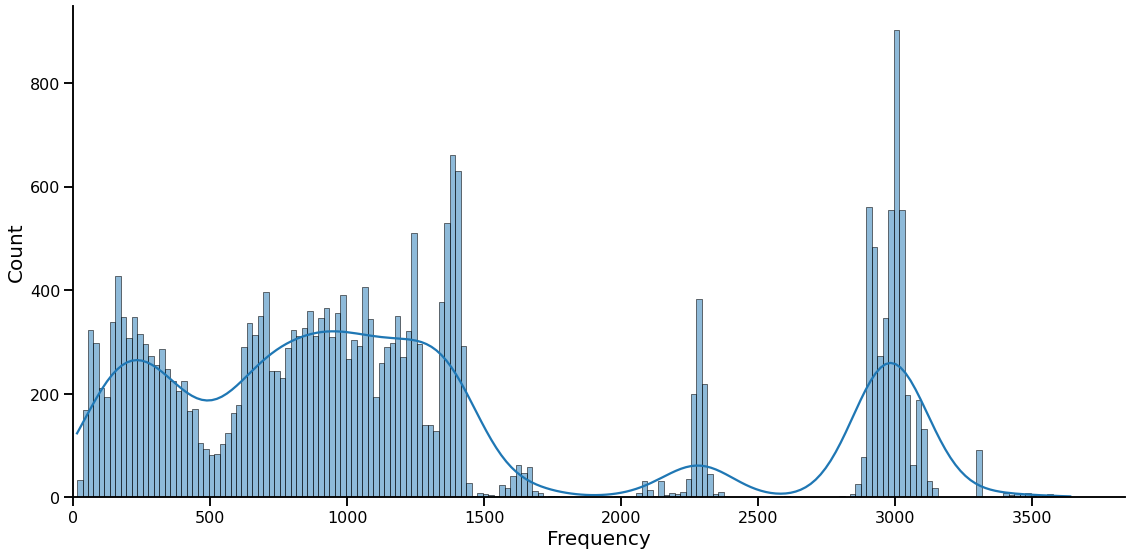

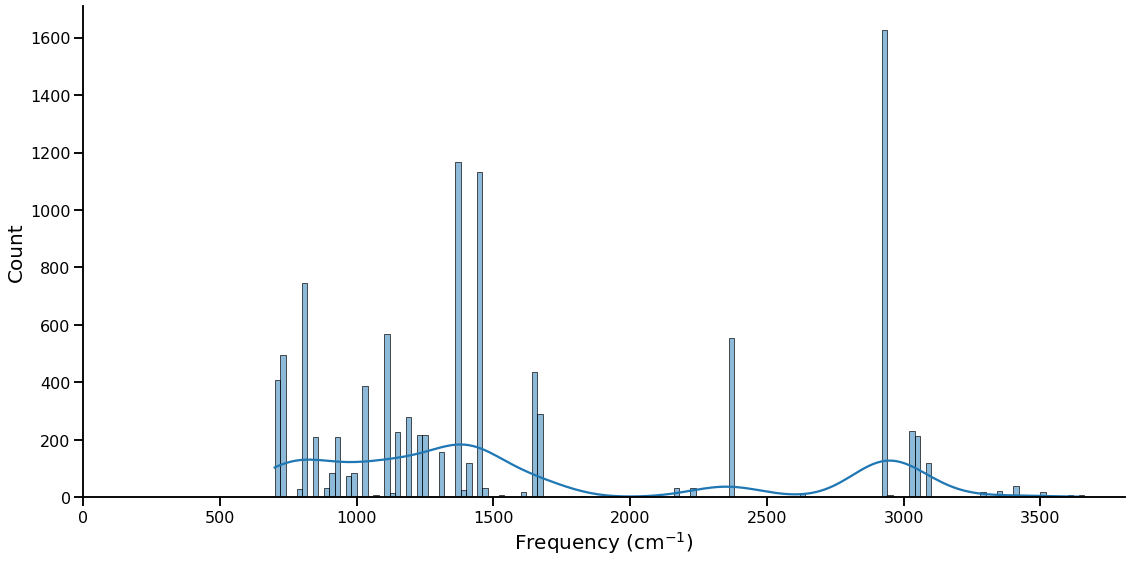

In [571]:
g = sns.displot(data = vib.query("Frequency>0 and Frequency <@pdf.freq.max() and Kind == 'FundScaled'"), 
                x = "Frequency", kind = 'hist', 
                binwidth = 20, height = 8, 
                aspect = 2, kde = True)
plt.xlim(0,)

g = sns.displot(data = subpdf, x = "freq", binwidth=20, kind = 'hist',
                  multiple='layer', stat = 'count', height = 8, aspect = 2, palette='tab20', kde = True)


plt.xlim(0,)
plt.xlabel("Frequency (cm$^{-1}$)")


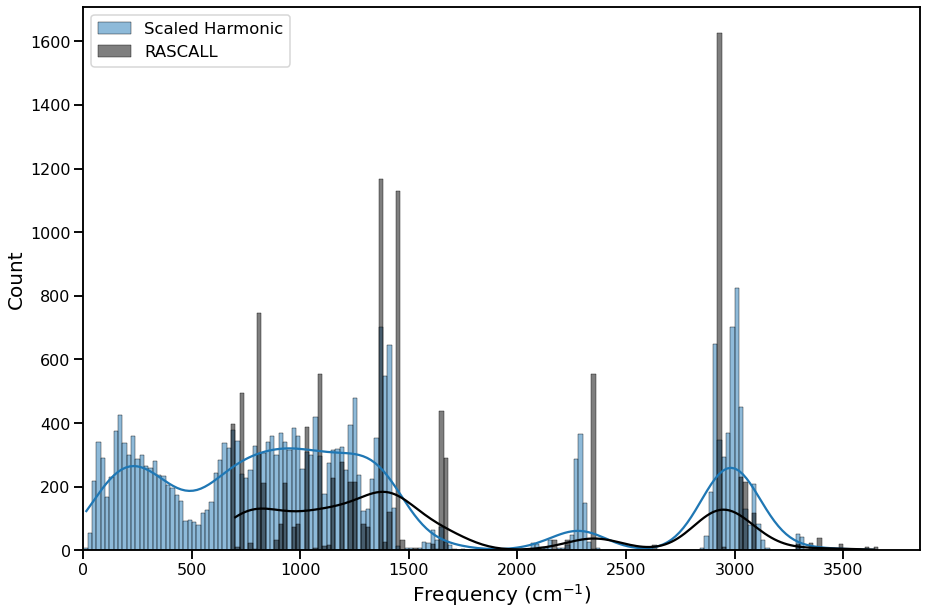

In [680]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)


sns.histplot(data = vib.query("Frequency>0 and Frequency <@pdf.freq.max() and Kind == 'FundScaled'"), 
                x = "Frequency", binwidth = 20, kde = True, ax = ax, label = "Scaled Harmonic", 
            binrange = (vib.Frequency.min(), pdf.freq.max()))
# plt.xlim(0,)

sns.histplot(data = subpdf, x = "freq", binwidth=20, binrange = (vib.Frequency.min(), pdf.freq.max()),
                kde = True, ax = ax, color = 'k', label = "RASCALL")


plt.xlim(0,)
plt.xlabel("Frequency (cm$^{-1}$)")
plt.legend()


Adding width and profile to stick spectra

In [377]:
def figoptsdisplay():
    plt.rc('figure',figsize=[10,8])
    plt.rc('font', size='16')
    plt.rc('xtick', labelsize='16')
    plt.rc('ytick', labelsize='16')
    plt.rc('axes', labelsize='20')
    plt.rcParams['xtick.major.bottom']=True
    plt.rcParams['xtick.minor.bottom']=True
    plt.rcParams['ytick.major.left']=True
    plt.rcParams['ytick.minor.left']=True
    plt.rcParams.update({'figure.autolayout': False})


###The below functions enables us to have the double axis with wavenumber and wavelength

def tick_function(X):
    V = 1.0000000e4/(X)
    return ["%.2f" % z for z in V]

def mkaxis():
    ax1.set_xlabel(r'Wavenumber / cm$^{-1}$')
    ax1.set_ylabel(r'Absorbance / (arb. units)')
    ax1Ticks = ax1.get_xticks()
    ax2Ticks = ax1Ticks
    ax2.set_xticks(ax2Ticks)
    ax2.set_xbound(ax1.get_xbound())
    ax2.set_xticklabels(tick_function(ax2Ticks))
    ax1.set_yticklabels(abs(ax2Ticks))
    ax2.set_xlabel(r"Wavelength / $\mu m$")
    from matplotlib.ticker import FormatStrFormatter
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.5s'))
    

In [544]:
def spectrawidth(freq, intensity, peakwidth = 20):
    minfreq = min(freq)- min(freq)*0.1
    maxfreq = max(freq) + max(freq)*0.1
    npts = int((maxfreq-minfreq)/1.0) #one datapoint per wavnumber
    x = np.linspace(minfreq,maxfreq,npts)
    y = np.zeros(npts)
    for i in range(len(freq)):
        #This add each peak sequentially based on the intensity of the peak and the 
        y = y + np.exp(-(2.77/(2*peakwidth)**2)*(x-freq[i]*scalingfactor)**2)*intensity[i]
    return x, y

/Users/mckemmishgroup/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator


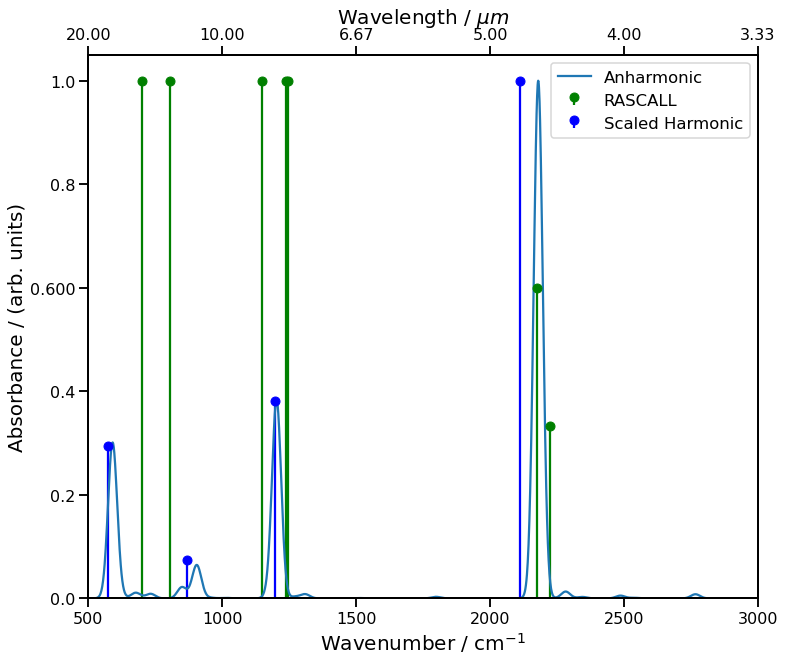

In [701]:


figoptsdisplay() 
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.set_xlim(minfreq,maxfreq)
mkaxis()




mol = vib.query("SMILES=='O=PC#CCl' and Kind in @anha").reset_index()

wfreq, wintens = spectrawidth(mol['Frequency'], norminten(mol['Intensity']), peakwidth= 20)
ax1.plot(wfreq,wintens, label=  "Anharmonic")
ax1.stem(pdf.query("mol=='O=PC#CCl'")['freq'], pdf.query("mol=='O=PC#CCl'")['inten']/3, 
         'g', markerfmt='go', label = "RASCALL", basefmt=" ")
ax1.stem(vib.query("SMILES=='O=PC#CCl' and Kind == 'FundScaled'")['Frequency'],
         norminten(vib.query("SMILES=='O=PC#CCl' and Kind == 'FundScaled'")['Intensity']), 
         'b', markerfmt='bo', label = "Scaled Harmonic", basefmt=" ")

plt.ylim(0,)
ax1.legend()
plt.show()

Searching NIST for matches in all p molecules

In [507]:
#all p mol df - different labes, no atoms, life etc...
pmol = pd.read_csv("pmolecules.csv")
# pmol.head()

In [508]:
nist = []
with open("NIST-P.csv") as f:
    for line in f:
        nist.append(line.split("(")[-1].split(')')[0])

for n in nist:
    if n in pmol.Formula.unique():
        print(n)

C2H7O3P
C3H7Cl2P


Reading NIST data and making it plottable

In [391]:
# filename = "nist_data/CH5O3P.txt"
def readnist(filename):
    with open(filename,'r')as NIST:
        Nfreq=[]
        Nintens=[]
        cnt = 0
    #     start = False
        formula = filename.split("/")[-1].split(".")[0]
    #     print(formula)
        for line in NIST: 
            cnt +=1
            if "TITLE" in line:
                molecule = line.split('=')[-1]
    #             print(molecule)
            if "YUNITS" in line:
                kind = line.split('=')[-1]
#                 print(kind)
            if "STATE" in line:
                state = line.split('=')[-1].split()[0]
    #             print(state)
            if "XUNITS" in line:
                units = line.split('=')[-1]
    #             print (units)
    #         while start is True:
            if cnt >10 and "#" not in line:
                Nfreq.append(float(line.split()[0]))
                Nintens.append(float(line.split()[1]))

    if "MICROMETERS" in units:
    #         print("yes")
        freq = []
        for i in range(len(Nfreq)):
            freq.append(10000/Nfreq[i])
        Nfreq = freq

        #normalise and shift transmittance to be positive and upward
    minin = min(Nintens)
    maxin = max(Nintens)
#     print(minin, maxin)
    if "TRANS" in kind:
        for i in range(len(Nintens)):
            Nintens[i]= (-Nintens[i]+maxin)/maxin
    else:
        for i in range(len(Nintens)):
            Nintens[i]= Nintens[i]/maxin
            
    nistmol = {"name":formula, "state": state, "frequnits":units, "npoints":len(Nfreq), "freq":Nfreq, "inten":Nintens}

    return nistmol

In [392]:
nmol = readnist("nist_data/CH5O3P.txt")

In [403]:
nmol['name']

'CH5O3P'

In [509]:
match = list(vib[vib["Formula"]==nmol['name']].SMILES.unique())
len(match)

1

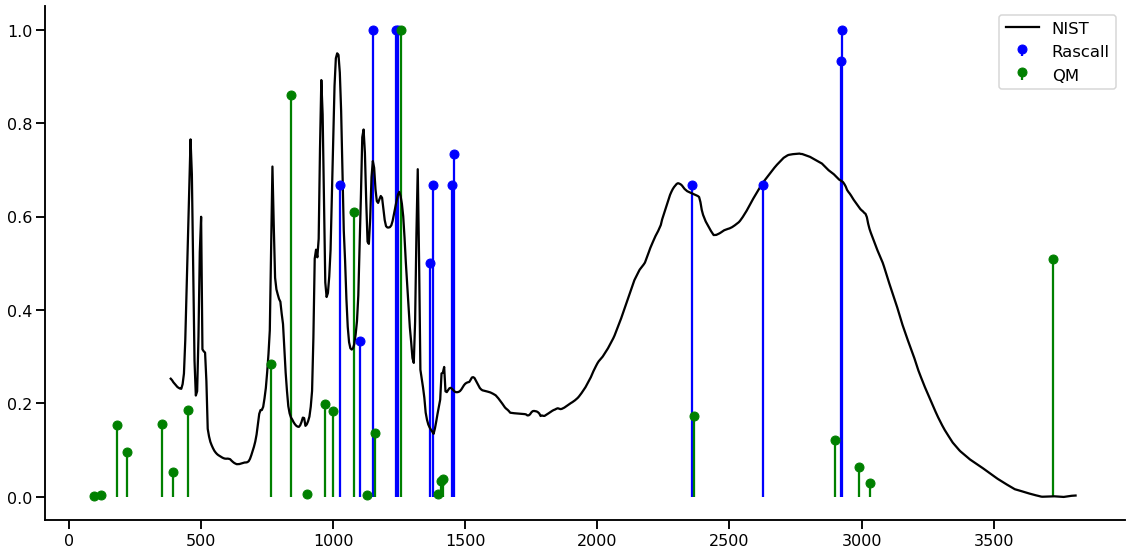

In [706]:
sns.relplot(x = nmol['freq'], y = nmol['inten'], kind = "line", height = 8, aspect = 2, color = "k", label = "NIST")
sub=pdf.query("mol in @match")
plt.stem(sub['freq'],  sub['inten']/3, 'b', markerfmt='bo', label = "Rascall", basefmt=" ")
name = nmol['name']
plt.stem(vib.query("BaseForm == @name and Kind == 'FundScaled'")['Frequency'], 
         norminten(vib.query("BaseForm == @name and Kind == 'FundScaled'")['Intensity']),
        'g', markerfmt='go', label = "QM", basefmt=" ")
plt.legend()
plt.show()
#plt.plot(freq, Nintens)


In [600]:
pmol.head()

,Formula,SMILES,Tot_atoms,Tot_nH_atoms,Dataset_no,Molecular_weight,IUPAC_chemname,Metalloid,EPISUITE,InChI_Code,InChI_Key,Boiling_Point,BP_basis,EPIsuite_output,MP,Basis,Life
0,H3P,P,4,1,19,33.9978,phosphane,N,P,InChI=1S/H3P/h1H3,InChIKey=XYFCBTPGUUZFHI-UHFFFAOYSA-N,-87.250000,Ex,468.18(BP est) 162.02(MP est) -87.70(...,-133.00,Expt,Y
1,HOP,P=O,3,2,66,47.9808,oxophosphane,N,P=O,InChI=1S/HOP/c1-2/h2H,InChIKey=AUONHKJOIZSQGR-UHFFFAOYSA-N,1.951020,Pr,480.00(BP est) 90.27(MP est) ----(...,90.27,Pred,N
2,CH5P,CP,7,2,68,48.0248,methylphosphane,N,CP,"InChI=1S/CH5P/c1-2/h2H2,1H3",InChIKey=SAWKFRBJGLMMES-UHFFFAOYSA-N,-17.100000,Ex,6.93(BP est) -125.19(MP est) ----(...,-125.19,Pred,N
3,H4NP,NP,6,2,72,49.0128,phosphanamine,N,NP,InChI=1S/H4NP/c1-2/h1-2H2,InChIKey=XQJHRCVXRAJIDY-UHFFFAOYSA-N,41.100121,Pr,497.87(BP est) 195.11(MP est) ----(...,195.11,Pred,N
4,H3OP,[H][P]([H])([H])=O,5,2,14947,49.9968,phosphine oxide,N,O=P,InChI=1S/H3OP/c1-2/h2H3,InChIKey=MPQXHAGKBWFSNV-UHFFFAOYSA-N,1.889153,Pr,480.00(BP est) 90.27(MP est) ----(...,90.27,Pred,N


In [673]:
pmol.describe()

,Tot_atoms,Tot_nH_atoms,Dataset_no,Molecular_weight,Boiling_Point,MP
count,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000
mean,11.166667,5.700939,8753.463850,170.329349,145.214203,-39.608531
std,2.557909,0.602367,3857.638958,66.425066,57.521139,42.343450
min,3.000000,1.000000,19.000000,33.997800,-87.250000,-146.480000
25%,9.000000,6.000000,5596.250000,110.521000,104.700000,-67.517500
50%,11.000000,6.000000,8801.000000,165.356000,145.690000,-41.580000
75%,13.000000,6.000000,12218.500000,217.950000,185.970000,-13.862500
max,19.000000,6.000000,17775.000000,378.714000,377.000000,286.250000


In [675]:
# pmol.query("Tot_atoms==3")

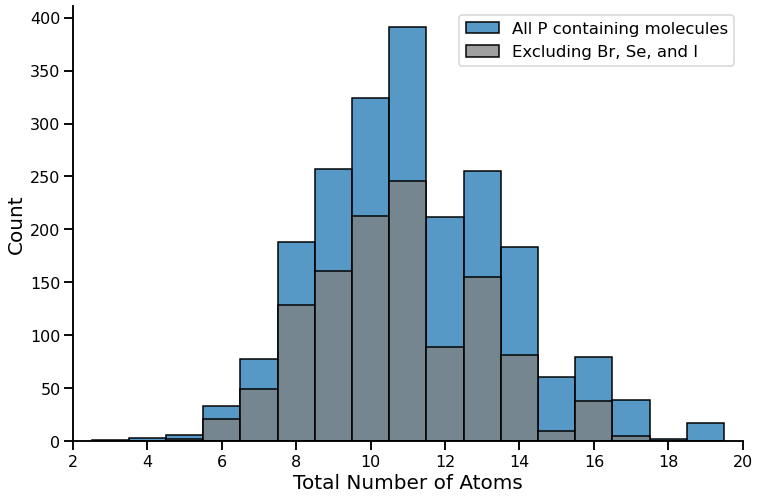

In [693]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# pmol[pmol["Formula"].str.contains("P")]

sns.histplot(data = pmol, x = "Tot_atoms", ax = ax, 
                binwidth = 1, label = "All P containing molecules", discrete=True)

sns.histplot(data = pmol[pmol["Formula"].str.contains("[Br|Se|I]")], x = "Tot_atoms", ax = ax, 
                binwidth = 1, color = 'grey', label = "Excluding Br, Se, and I", discrete=True)


plt.xlabel("Total Number of Atoms")
plt.xlim(2,20)
sns.despine()
plt.legend()

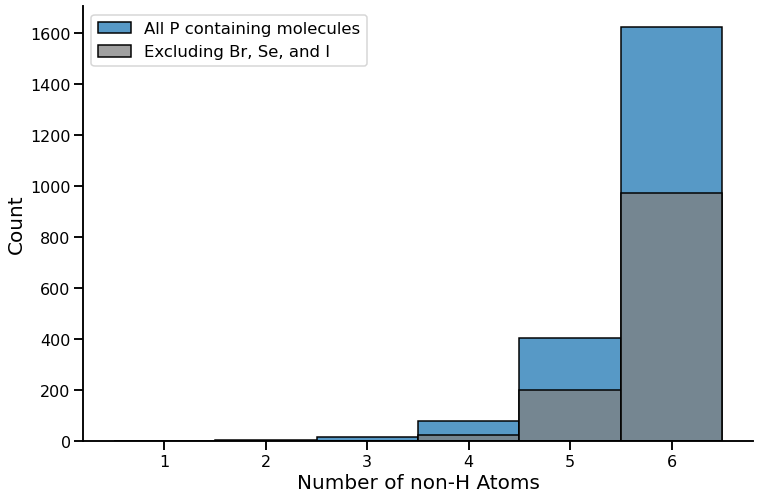

In [707]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# pmol[pmol["Formula"].str.contains("P")]

sns.histplot(data = pmol, x = "Tot_nH_atoms", ax = ax, 
                binwidth = 1, label = "All P containing molecules", discrete=True)

sns.histplot(data = pmol[pmol["Formula"].str.contains("[Br|Se|I]")], x = "Tot_nH_atoms", ax = ax, 
                binwidth = 1, color = 'grey', label = "Excluding Br, Se, and I", discrete=True)


plt.xlabel("Number of non-H Atoms")
# plt.xlim(4,)
sns.despine()
plt.legend()
# plt.yscale("log")